In [2]:
 # 引入模块
# -*- coding:utf-8 -*-

# 常用包的函数
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# 解决显示汉字不正确问题
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

%matplotlib inline

pd.set_option('precision', 6) #设置精度
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
pd.options.display.max_rows = 100
    

In [3]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                             'foo', 'bar', 'foo', 'foo'],
                     'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                      'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.24,0.49
1,bar,one,2.42,0.79
2,foo,two,-1.16,0.25
3,bar,three,0.34,-0.45
4,foo,two,0.17,0.26
5,bar,two,-0.17,0.93
6,foo,one,0.69,-0.46
7,foo,three,0.18,0.77


In [4]:
df.groupby(['A','B']).mean()

C     D
A   B                
bar one    2.42  0.79
    three  0.34 -0.45
    two   -0.17  0.93
foo one    0.22  0.02
    three  0.18  0.77
    two   -0.50  0.26

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026555816978>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000265555F8358>], dtype=object)

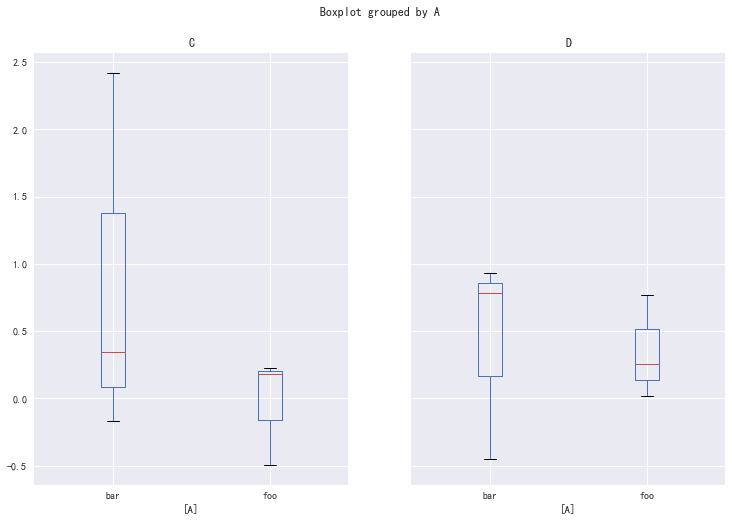

In [9]:
df = df.groupby(['A','B']).mean()
df.boxplot(by='A',figsize=(12,8))

In [10]:
df

C     D
A   B                
bar one    2.42  0.79
    three  0.34 -0.45
    two   -0.17  0.93
foo one    0.22  0.02
    three  0.18  0.77
    two   -0.50  0.26

C:\software\anaconda3\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


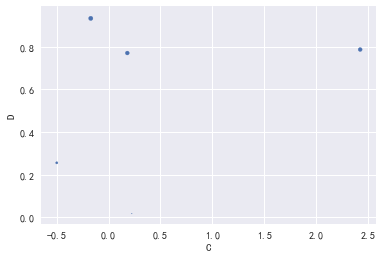

In [11]:
df.plot(kind='scatter', x='C', y='D', s=df['D']*20);

In [12]:
df

C     D
A   B                
bar one    2.42  0.79
    three  0.34 -0.45
    two   -0.17  0.93
foo one    0.22  0.02
    three  0.18  0.77
    two   -0.50  0.26

In [13]:
dd = df[df['C'] > 0]
dd

C     D
A   B               
bar one   2.42  0.79
    three 0.34 -0.45
foo one   0.22  0.02
    three 0.18  0.77

In [14]:
dd['C'][dd.C > 2] = 1
dd

C:\software\anaconda3\lib\site-packages\pandas\core\generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\software\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


C     D
A   B               
bar one   1.00  0.79
    three 0.34 -0.45
foo one   0.22  0.02
    three 0.18  0.77

In [12]:
grouped = df.groupby('A')
for a,group1 in grouped:
    print(a)
    print(group1)

bar
     A      B     C     D
1  bar    one  1.09 -0.54
3  bar  three -2.28 -0.14
5  bar    two  0.83 -0.97
foo
     A      B     C     D
0  foo    one  0.56  0.10
2  foo    two -1.30  0.16
4  foo    two  0.89 -0.83
6  foo    one -0.29  0.34
7  foo  three  0.42 -1.01


In [13]:
grouped = df.groupby(['A', 'B'])
# 多重键的情况，元组的第一个元素将会是由键值组成的元组
for(k1,k2),group in grouped:
    print(k1,k2)
    print(group)

bar one
     A    B    C     D
1  bar  one 1.09 -0.54
bar three
     A      B     C     D
3  bar  three -2.28 -0.14
bar two
     A    B    C     D
5  bar  two 0.83 -0.97
foo one
     A    B     C    D
0  foo  one  0.56 0.10
6  foo  one -0.29 0.34
foo three
     A      B    C     D
7  foo  three 0.42 -1.01
foo two
     A    B     C     D
2  foo  two -1.30  0.16
4  foo  two  0.89 -0.83


In [14]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'
grouped = df.groupby(get_letter_type, axis=1)
for a,group1 in grouped:
    print(a)
    print(group1)

consonant
       B     C     D
0    one  0.56  0.10
1    one  1.09 -0.54
2    two -1.30  0.16
3  three -2.28 -0.14
4    two  0.89 -0.83
5    two  0.83 -0.97
6    one -0.29  0.34
7  three  0.42 -1.01
vowel
     A
0  foo
1  bar
2  foo
3  bar
4  foo
5  bar
6  foo
7  foo


In [21]:
lst = [1, 2, 3, 1, 2, 3]
s = pd.Series([1, 2, 3, 10, 20, 30], lst)
s

,consonant,vowel
0,0.67,foo
1,0.55,bar
2,-1.15,foo
3,-2.43,bar
4,0.07,foo
5,-0.14,bar
6,0.05,foo
7,-0.59,foo


In [22]:
df3 = pd.DataFrame({'X' : ['A', 'B', 'A', 'B'], 'Y' : [1, 4, 3, 2]})
df3

,X,Y
0,A,1
1,B,4
2,A,3
3,B,2


In [23]:
df3.groupby(['X']).get_group('A')

,X,Y
0,A,1
2,A,3


In [24]:
df3.groupby(['X']).get_group('B')

,X,Y
1,B,4
3,B,2


In [25]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [1]:
df.gr

NameError: name 'df' is not defined